<a href="https://colab.research.google.com/github/Alfonzo1114/Alfonzo1114/blob/main/Course_7_Salifort_Motors_project_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


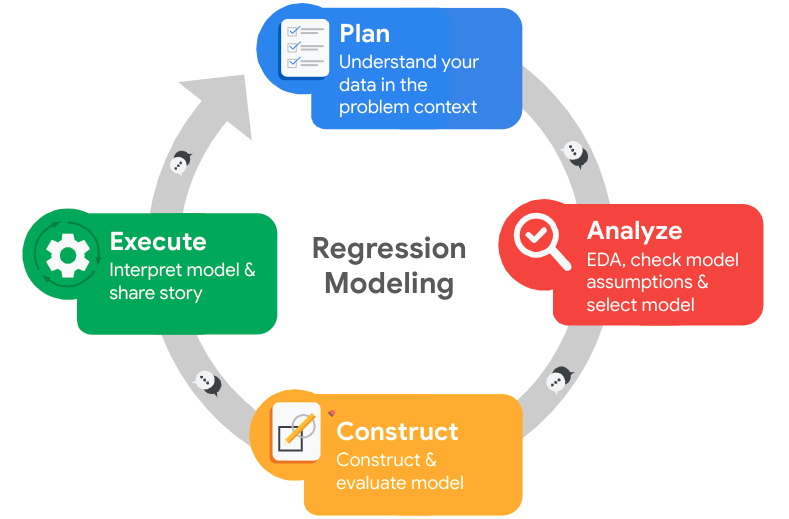

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import packages

#For data manipulation
import pandas as pd
import numpy as np

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For displaying all of the columns in dataframes in pandas
pd.set_option('display.max_columns', None)

#From the xgboost API
from xgboost import XGBClassifier, XGBRegressor, plot_importance

#From other models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import sklearn.ensemble as ensemble

#For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn.metrics as metrics
from sklearn.tree import plot_tree

#For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# Load dataset into a dataframe
df0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HR_capstone_dataset.csv')
# Display first few rows of the dataframe
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [ ]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


We have 2 categorical columns:
1. Department
2. salary

In [ ]:
print(f"Number of rows: {df0.shape[0]}\nNumber of columns: {df0.shape[1]}")

Number of rows: 14999
Number of columns: 10


### Gather descriptive statistics about the data

In [ ]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe().round(3)

satisfaction_level  last_evaluation  number_project  \
count           14999.000        14999.000       14999.000   
mean                0.613            0.716           3.803   
std                 0.249            0.171           1.233   
min                 0.090            0.360           2.000   
25%                 0.440            0.560           3.000   
50%                 0.640            0.720           4.000   
75%                 0.820            0.870           5.000   
max                 1.000            1.000           7.000   

       average_montly_hours  time_spend_company  Work_accident       left  \
count             14999.000           14999.000      14999.000  14999.000   
mean                201.050               3.498          0.145      0.238   
std                  49.943               1.460          0.352      0.426   
min                  96.000               2.000          0.000      0.000   
25%                 156.000               3.000          0.000      0.000   
50%                 200.000               3.000          0.000      0.000   
75%                 245.000               4.000          0.000      0.000   
max                 310.000              10.000          1.000      1.000   

       promotion_last_5years  
count              14999.000  
mean                   0.021  
std                    0.144  
min                    0.000  
25%                    0.000  
50%                    0.000  
75%                    0.000  
max                    1.000

In [ ]:
df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

### Rename columns

As a data cleaning step, rename the columns as needed. We will standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns as needed
df0 = df0.rename(columns = {'Work_accident' : 'work_accident',
                            'average_montly_hours' : 'average_monthly_hours',
                            'time_spend_company' : 'tenure',
                            'Department' : 'department'})


# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [ ]:
columns_considered = df0.columns[df0.dtypes != 'object']
columns_considered = columns_considered.drop(['promotion_last_5years', 'work_accident', 'left'])
columns_considered

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure'],
      dtype='object')

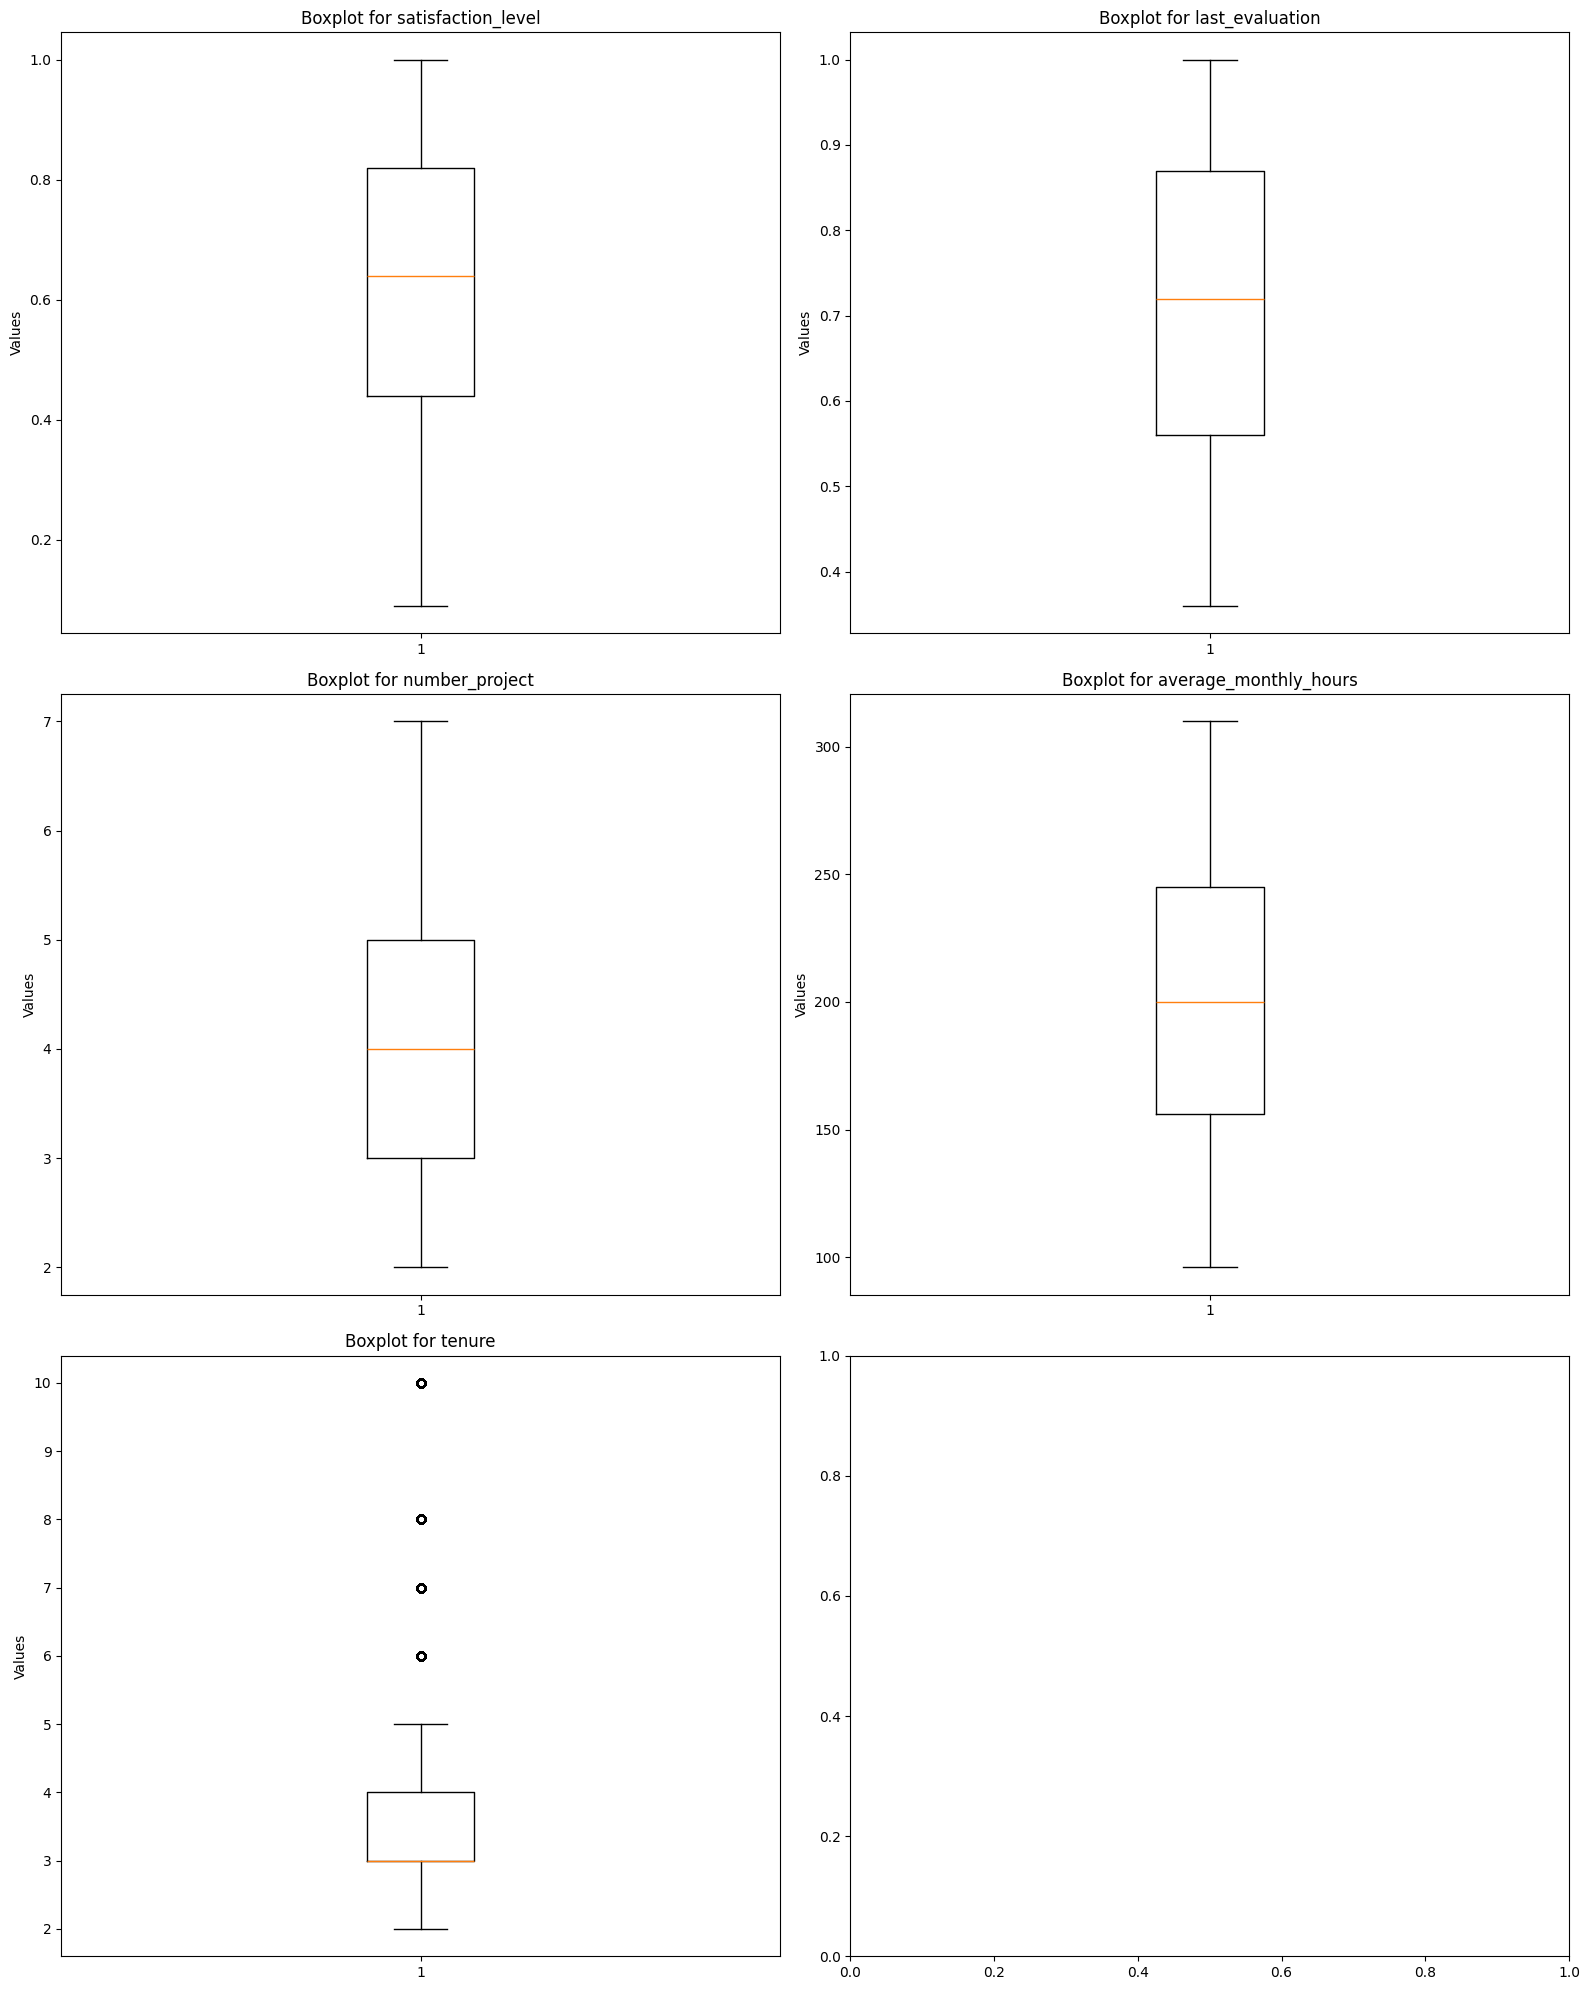

In [ ]:
# First remove categorical columns
columns_considered = df0.columns[df0.dtypes != 'object']
# Remove binary columns
columns_considered = columns_considered.drop(['promotion_last_5years', 'work_accident', 'left'])
num_columns = len(columns_considered)

# Create subplots
fig, axes = plt.subplots(nrows=num_columns//2+1, ncols=2, figsize=(16, 20))
# Flatten the axes array, as plt.subplots() returns a 2D array even for 1 column
axes = axes.flatten()
# Plot each column in a separate subplot
for idx, column in enumerate(columns_considered):
    axes[idx].boxplot(df0[column])
    axes[idx].set_title(f'Boxplot for {column}')
    axes[idx].set_ylabel('Values')

# Adjust layout
plt.tight_layout()
plt.show()

### Check missing values

Check for any missing values in the data.

In [ ]:
# Check for missing values
### YOUR CODE HERE ###
missing_values_summary = pd.DataFrame(df0.isna().sum(), columns=['Type'])
missing_values_summary['Type'] = missing_values_summary['Type'].apply(lambda x: 'Missing' if x > 0 else 'Non-Missing')
missing_values_summary

Type
satisfaction_level     Non-Missing
last_evaluation        Non-Missing
number_project         Non-Missing
average_monthly_hours  Non-Missing
tenure                 Non-Missing
work_accident          Non-Missing
left                   Non-Missing
promotion_last_5years  Non-Missing
department             Non-Missing
salary                 Non-Missing

**There are no missing values**

### Check duplicates

Check for any duplicate entries in the data.

In [ ]:
# Check for duplicates
duplicated_values = df0.duplicated().sum()
print("There are", duplicated_values, "values duplicated.")

There are 3008 values duplicated.


In [ ]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated].head()

satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

The above output shows the first five occurences of rows that are duplicated farther down in the dataframe. How likely is it that these are legitimate entries? In other words, how plausible is it that two employees self-reported the exact same response for every column?

You could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary. With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. We will proceed by dropping them.


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

In [ ]:
print(f"Number of rows: {df1.shape[0]}\nNumber of columns: {df1.shape[1]}")

Number of rows: 11991
Number of columns: 10


### Check outliers

Check for outliers in the data.

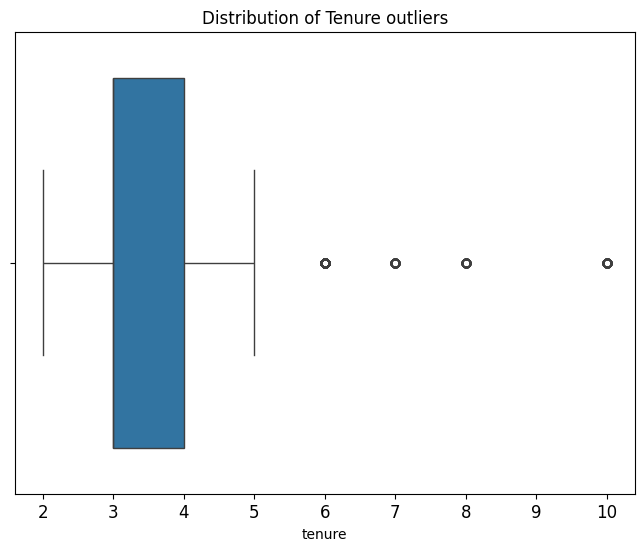

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(8, 6))
plt.title('Distribution of Tenure outliers')
plt.xticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

The boxplot above shows that there are outliers in the tenure variable.

It would be helpful to investigate how many rows in the data contain outliers in the tenure column.


In [ ]:
def detecting_outliers(df, col_name):
    # Determine the number of rows containing outliers
    #Compute the 25th percentile value in 'tenure'
    Q1 = df[col_name].quantile(0.25)

    #Compute the 75th percentile value in 'tenure'
    Q3 = df[col_name].quantile(0.75)

    # Compute the IQR. Inter Quantile Range
    IQR = Q3 - Q1

    #Obtain the corresponding limits
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    #Count the number of rows containing outliers in 'col_name'
    outliers = df[(df[col_name] > upper_limit) | (df[col_name] < lower_limit)]
    print("Number of rows containing outliers in", col_name, ":", outliers.shape[0])
    print("Proportion of rows containing outliers in the dataframe tenure:", round(len(outliers)*100/len(df), 2), "%")
    return None

detecting_outliers(df1, 'tenure')

Number of rows containing outliers in tenure : 824
Proportion of rows containing outliers in the dataframe tenure: 6.87 %


In [ ]:
detecting_outliers(df1, 'average_monthly_hours')
for col in columns_considered:
    detecting_outliers(df1, col)

Number of rows containing outliers in average_monthly_hours : 0
Proportion of rows containing outliers in the dataframe tenure: 0.0 %
Number of rows containing outliers in satisfaction_level : 0
Proportion of rows containing outliers in the dataframe tenure: 0.0 %
Number of rows containing outliers in last_evaluation : 0
Proportion of rows containing outliers in the dataframe tenure: 0.0 %
Number of rows containing outliers in number_project : 0
Proportion of rows containing outliers in the dataframe tenure: 0.0 %
Number of rows containing outliers in average_monthly_hours : 0
Proportion of rows containing outliers in the dataframe tenure: 0.0 %
Number of rows containing outliers in tenure : 824
Proportion of rows containing outliers in the dataframe tenure: 6.87 %


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [ ]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
# Get percentages of people who left vs. stayed
print('% share\n',round(df1['left'].value_counts(normalize=True)*1e2,2))


left
0    10000
1     1991
Name: count, dtype: int64
% share
 left
0    83.4
1    16.6
Name: proportion, dtype: float64


We can see we have an imbalance in our target binary classification, with 83.4% of our employees not leaving the company and 16.6% doing so.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

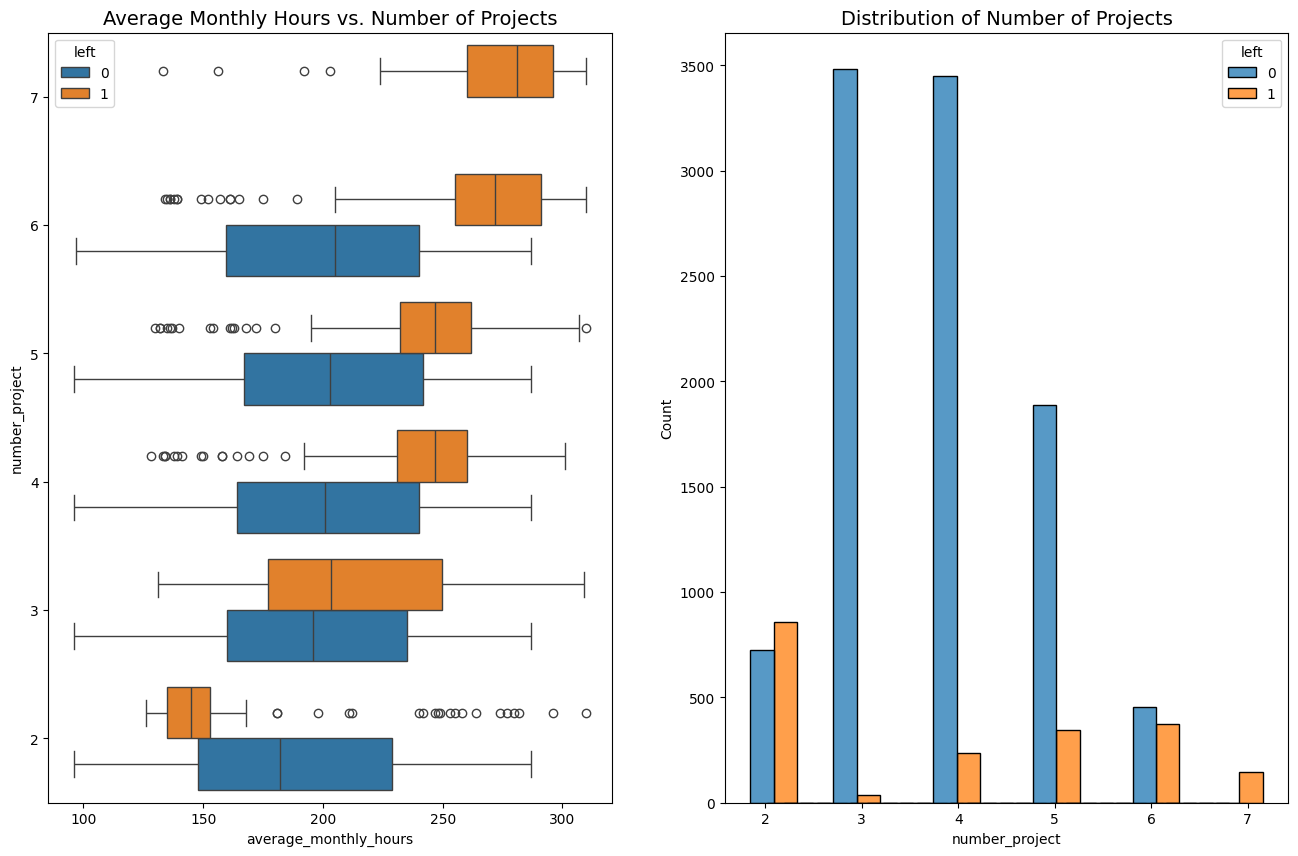

In [ ]:
def custom_plot(df, x_label, y_label, title_list):
    title_1, title_2 = title_list
    #Set figure and axes
    fig, ax = plt.subplots(1, 2, figsize=(16,10))

    sns.boxplot(data=df,
            x=y_label,
            y=x_label,
            hue='left',
            orient='h',
            ax=ax[0])
    ax[0].invert_yaxis() # The scale is inverted
    ax[0].set_title(title_1, fontsize='14')

    #Create histogram showing the distribution of ´number_project´, comparing
    #employees who stayed versis those who left
    sns.histplot(data=df,
                x=x_label,
                hue='left',
                multiple='dodge',
                shrink=2.8,
                ax=ax[1]),
    ax[1].set_title(title_2, fontsize='14')

    #Display the plots
    plt.show
    return fig, ax

fig, ax = custom_plot(df=df1,
            x_label='number_project',
            y_label='average_monthly_hours',
            title_list=['Average Monthly Hours vs. Number of Projects', 'Distribution of Number of Projects'])

##Considerations
It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

    There are two groups of employees who left the company:
     

*   (A) those who worked considerably less than their peers with the same number of projects
*   (B) those who worked much more.

 Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. This is the most critical group since their contribution to the company is greater.

    Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/month—much more than any other group.

    The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts, especially for the former one.

    If we assume a typical work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.


Next, let's examine the average monthly hours versus the satisfaction levels.

In [ ]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project'] == 7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

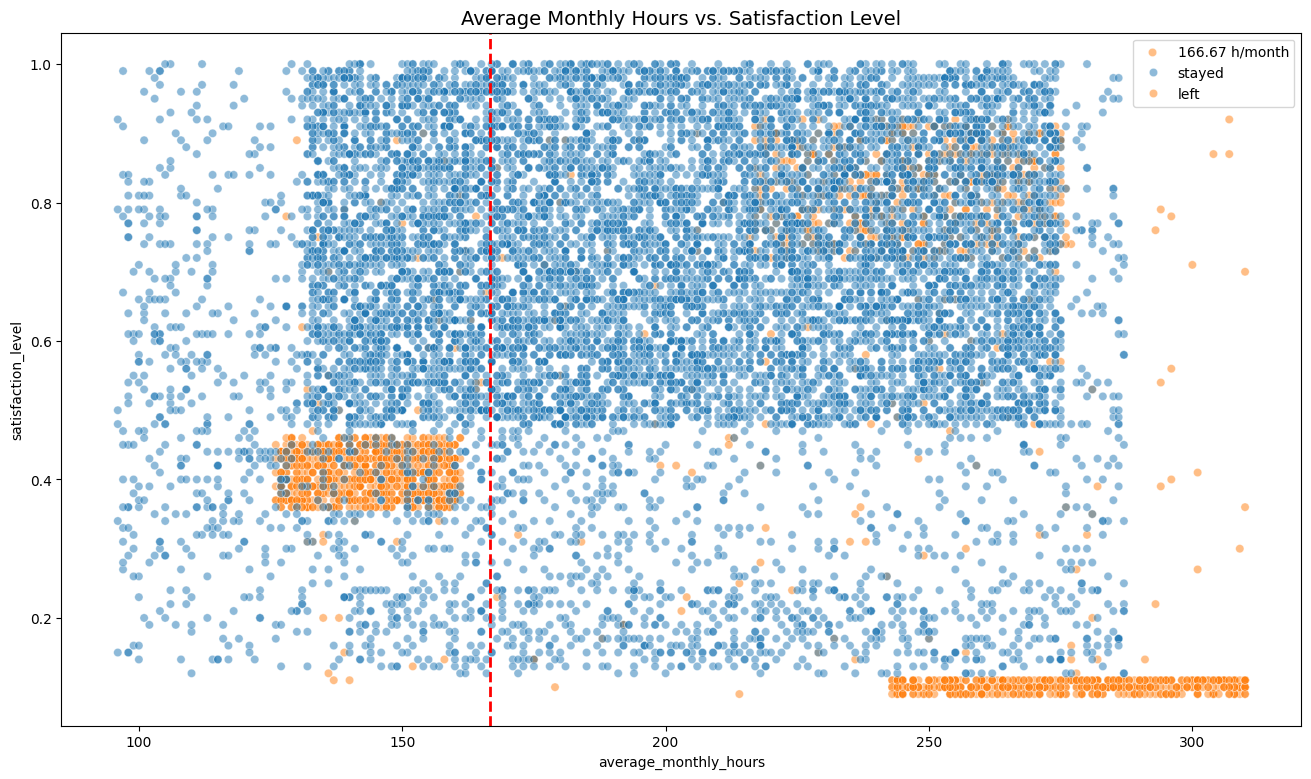

In [ ]:
# Create a plot as needed
#Create a scatterplot of ´average_monthly_hours´ versus ´satisfaction_level´, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1,
                x='average_monthly_hours',
                y='satisfaction_level',
                hue='left',
                alpha=0.5)
plt.axvline(x=166.67, color='red', linestyle='--', linewidth=2, label='Average Monthly Hours per Month(166.67 hours or 40h/week)')
plt.legend(labels=['166.67 h/month', 'stayed', 'left'])
plt.title('Average Monthly Hours vs. Satisfaction Level', fontsize='14')
plt.show()

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9.

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data.


For the next visualization, it might be interesting to visualize satisfaction levels by tenure.


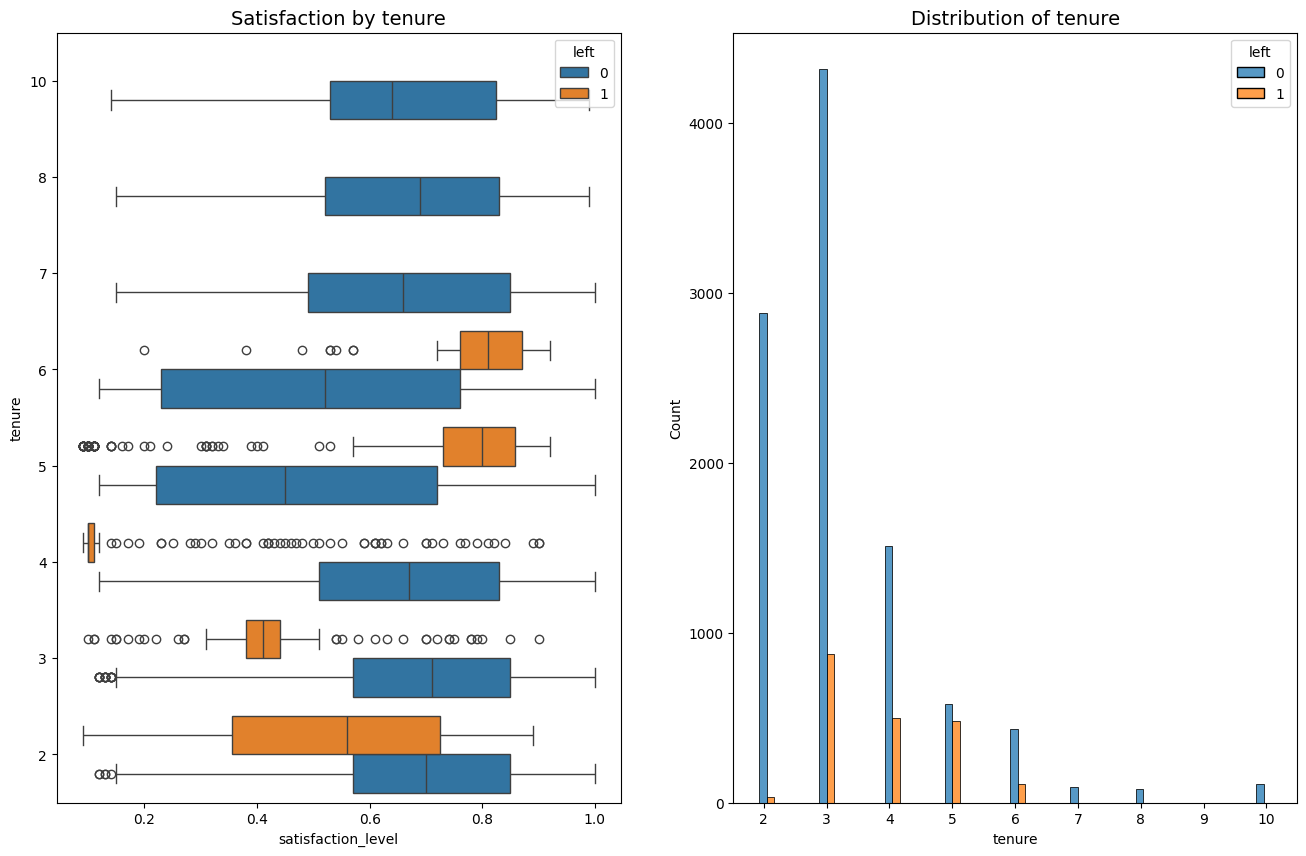

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = custom_plot(df=df1,
            x_label='tenure',
            y_label='satisfaction_level',
            title_list=['Satisfaction by tenure', 'Distribution of tenure'])

There are many observations you could make from this plot.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.
- The cohort with the highest number of departures are those of 3 years.

As the next step in analyzing the data, we will calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
df1.groupby(['left'])['satisfaction_level'].agg(['mean', 'median']).round(2)

mean  median
left              
0     0.67    0.69
1     0.44    0.41

As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

Next, you will examine salary levels for different tenures.


In [ ]:
# Create a plot as needed
# Define short tenured for someone <= 6 years, else considered long-tenured
df1['tenure_category'] = df1.apply(lambda x: 'short' if x['tenure'] <= 6 else 'long', axis=1)
df1.head()

<ipython-input-22-517e69614f6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tenure_category'] = df1.apply(lambda x: 'short' if x['tenure'] <= 6 else 'long', axis=1)


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  \
0       3              0     1                      0      sales     low   
1       6              0     1                      0      sales  medium   
2       4              0     1                      0      sales  medium   
3       5              0     1                      0      sales     low   
4       3              0     1                      0      sales     low   

  tenure_category  
0           short  
1           short  
2           short  
3           short  
4           short

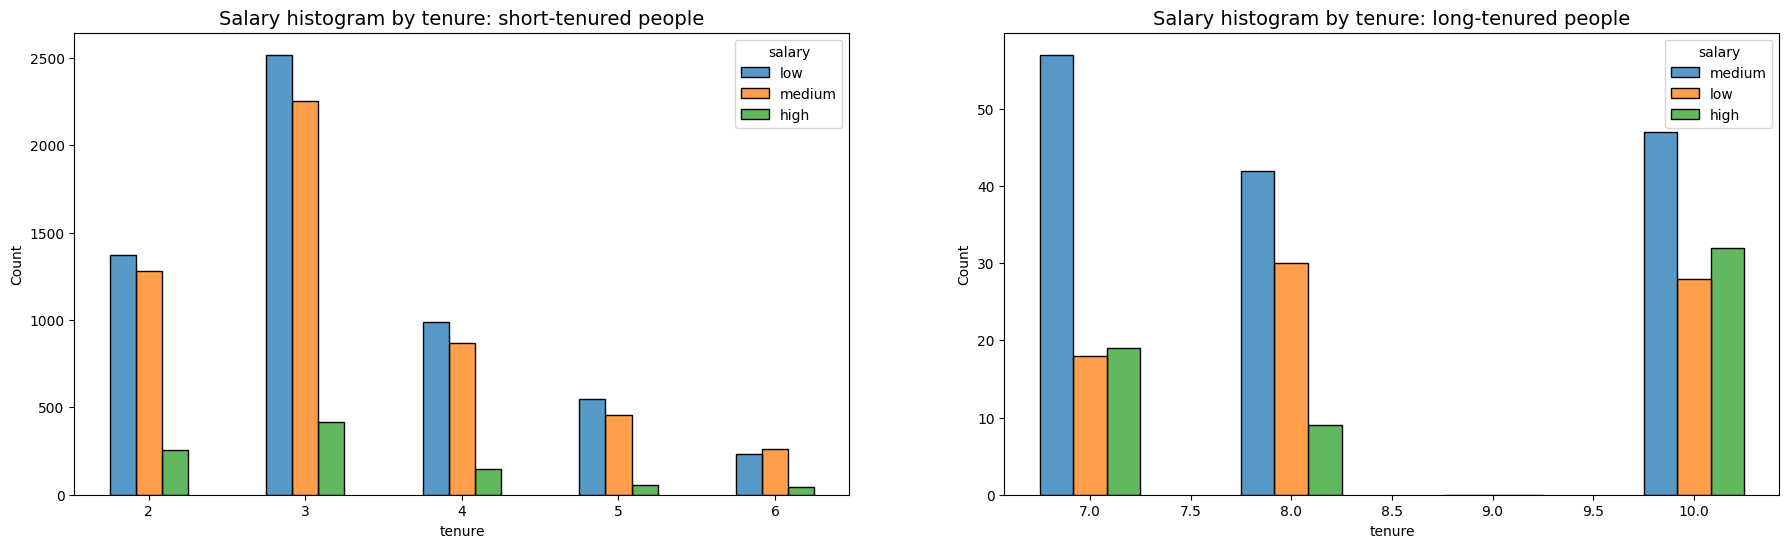

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###
#plot short-tenured histogram
fig, ax = plt.subplots(1, 2, figsize=(22, 6))
sns.histplot(data=df1[df1['tenure_category']=='short'],
             x='tenure',
             hue='salary',
             discrete=True,
             hue_order=['low','medium','high'],
             multiple='dodge',
             shrink=0.5,
             ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

#Plot long-tenured histogram
sns.histplot(data=df1[df1['tenure_category']=='long'],
             x='tenure',
             hue='salary',
             discrete=True,
             multiple='dodge',
             shrink=0.5,
             ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')
plt.show()

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.

Next, you could explore whether there's a correlation between working long hours and receiving high evaluation scores. You could create a scatterplot of `average_monthly_hours` versus `last_evaluation`.

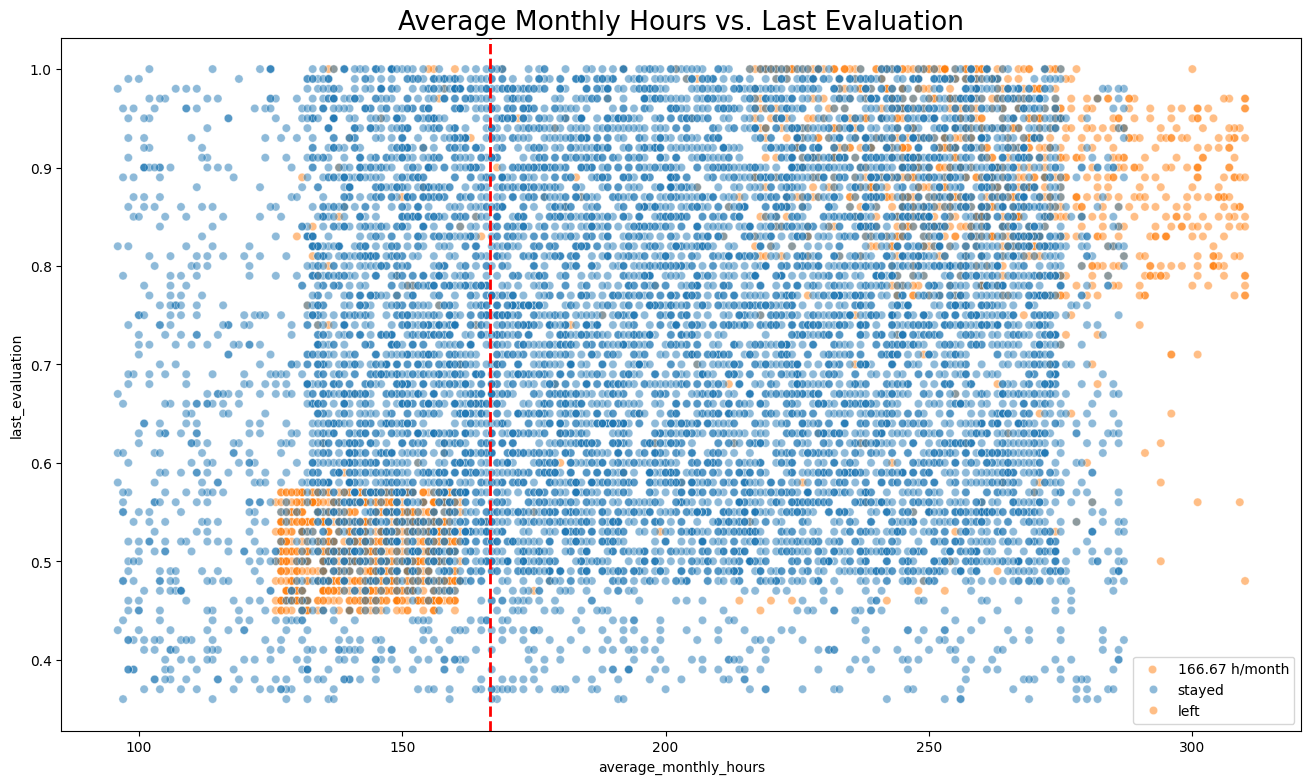

In [ ]:
# Create a plot as needed
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1,
                x='average_monthly_hours',
                y='last_evaluation',
                hue='left',
                alpha=0.5)
plt.axvline(x=166.67, color='red', linestyle='--', linewidth=2, label='Average Monthly Hours per Month(166.67 hours or 40h/week)')
plt.legend(labels=['166.67 h/month','stayed','left'])
plt.title('Average Monthly Hours vs. Last Evaluation', fontsize='19')
plt.show()

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.
- There seems to be a correlation between hours worked and evaluation score.
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, we will examine whether employees who worked very long hours were promoted in the last five years.

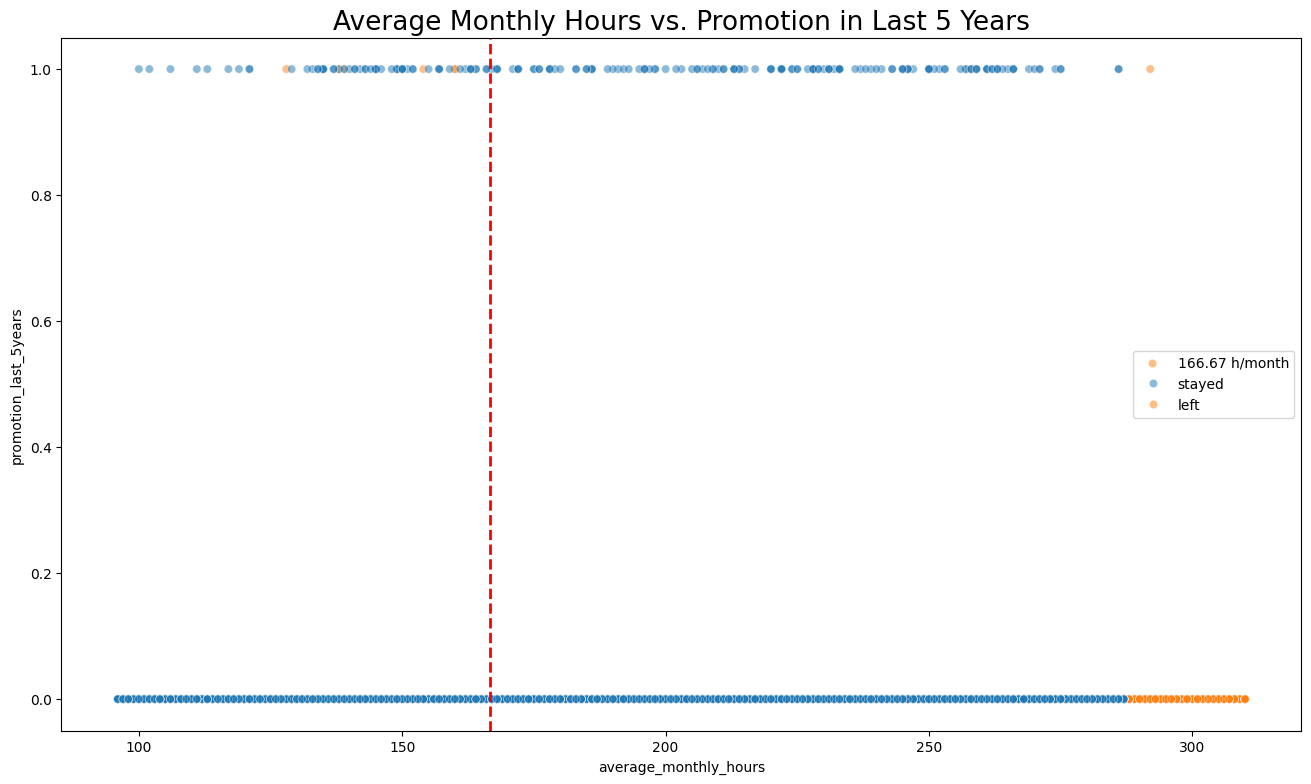

In [ ]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1,
                x='average_monthly_hours',
                y='promotion_last_5years',
                hue='left',
                alpha=0.5)

plt.axvline(x=166.67,
            color='red',
            linestyle='--',
            linewidth=2,
            label='Average Monthly Hours per Month(166.67 hours or 40h/week)')
plt.legend(labels=['166.67 h/month','stayed','left'])
plt.title('Average Monthly Hours vs. Promotion in Last 5 Years', fontsize='19')
plt.show()

The plot above shows the following:
- very few employees who were promoted in the last five years left (upper values)
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours (>275 hours)

Next, we could inspect how the employees who left are distributed across departments.

In [ ]:
# Display counts for each department
df1['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [ ]:
proportion_department = df1.groupby(['left'])['department'].value_counts().unstack().round(2)
proportion_department

department   IT  RandD  accounting   hr  management  marketing  product_mng  \
left                                                                          
0           818    609         512  488         384        561          576   
1           158     85         109  113          52        112          110   

department  sales  support  technical  
left                                   
0            2689     1509       1854  
1             550      312        390

<function matplotlib.pyplot.show(close=None, block=None)>

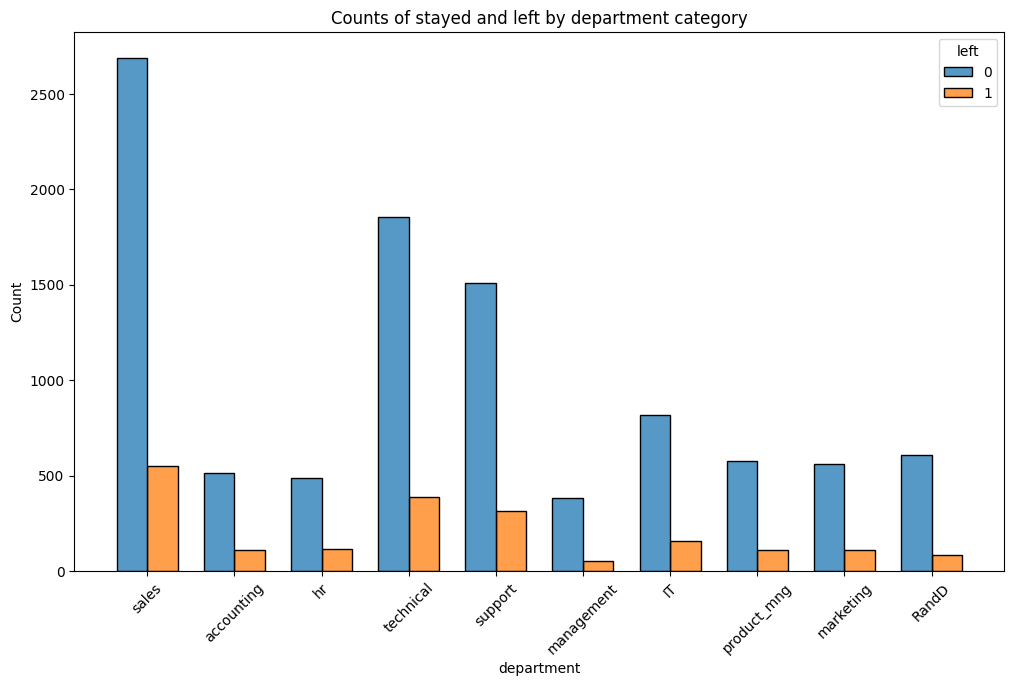

In [ ]:
#Create a stacked histogram to compare department distribution
# of employees who left the company to that of employees who didn't
plt.figure(figsize=(12,7))
sns.histplot(data=df1,
             x='department',
             hue='left',
             multiple='dodge',
             shrink=0.7
             )
plt.title('Counts of stayed and left by department category')
plt.xticks(rotation=45)
plt.show

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

Lastly, we can check for strong correlation between variables in the data.

In [ ]:
df1.select_dtypes(include=np.number)

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_monthly_hours  tenure  work_accident  left  \
0                        157       3              0     1   
1                        262       6              0     1   
2                        272       4              0     1   
3                        223       5              0     1   
4                        159       3              0     1   
...                      ...     ...            ...   ...   
11995                    259      10              1     0   
11996                    266      10              0     0   
11997                    185      10              0     0   
11998                    172      10              0     0   
11999                    180       3              0     0   

       promotion_last_5years  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
11995                      1  
11996                      1  
11997                      1  
11998                      1  
11999                      0  

[11991 rows x 8 columns]

In [ ]:
# prompt: subset the numeric columns of a df

import numpy as np
# Select only numeric columns
numeric_df = df1.select_dtypes(include=np.number)
print(numeric_df.head())


   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  
0       3              0     1                      0  
1       6              0     1                      0  
2       4              0     1                      0  
3       5              0     1                      0  
4       3              0     1                      0  


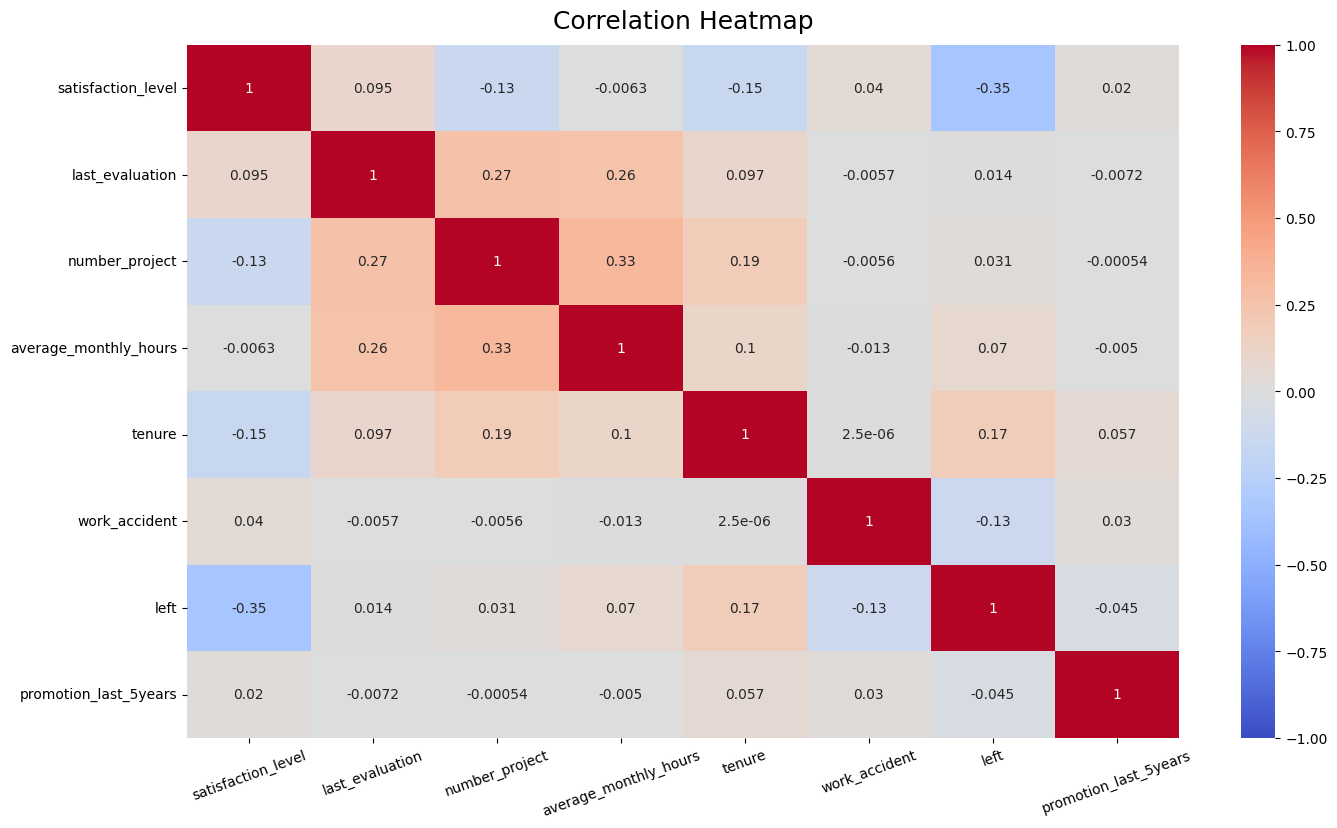

In [ ]:
#plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(data=df1.select_dtypes(include=np.number).corr(),
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap='coolwarm')
plt.xticks(rotation=20)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show;

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation (red hue)with each other, and whether an employee leaves is negatively correlated with their satisfaction level (blue hue).


### Insights

The key factors for employees deciding to leave the company are:


1.   Long working hours (the more hours, the more likelihood of employees departure)
2.   Number of projects (the more projects, the higher the departure rate)
3.  Low satisfaction levels

There is a sizeable group of employees at this compan who are probably burned out.

However, it appears as well that if an employee passes the six-year mark at the company, their risk to leave decreases considerably.



# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

-  Our task is to predict whether an employee will leave the company, which is a categorical outcome variable.
-  The taks is a binary classification problem, since the outcome `left` ca be either 1 (indicating employee left) or 0 (indicating employee did not leave).

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling
 We can add the following models:
- Logistic Regression Model
- Tree-based
- Ensemble of different models.


### Logistic regression
Note that binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`.

-  `department` is a categorical variable, which means you can dummy it for modeling.

-  `salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [ ]:
df1.head(3)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   

   tenure  work_accident  left  promotion_last_5years department  salary  \
0       3              0     1                      0      sales     low   
1       6              0     1                      0      sales  medium   
2       4              0     1                      0      sales  medium   

  tenure_category  
0           short  
1           short  
2           short

In [ ]:
# Creating a copy of our dataframe
df_enc = df1.copy()

#Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes

#Encode the `department` column as dummy variables
df_enc = pd.get_dummies(df_enc, columns=['department'], drop_first=False)
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary tenure_category  \
0       3              0     1                      0       0           short   
1       6              0     1                      0       1           short   
2       4              0     1                      0       1           short   
3       5              0     1                      0       0           short   
4       3              0     1                      0       0           short   

   department_IT  department_RandD  department_accounting  department_hr  \
0          False             False                  False          False   
1          False             False                  False          False   
2          False             False                  False          False   
3          False             False                  False          False   
4          False             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.


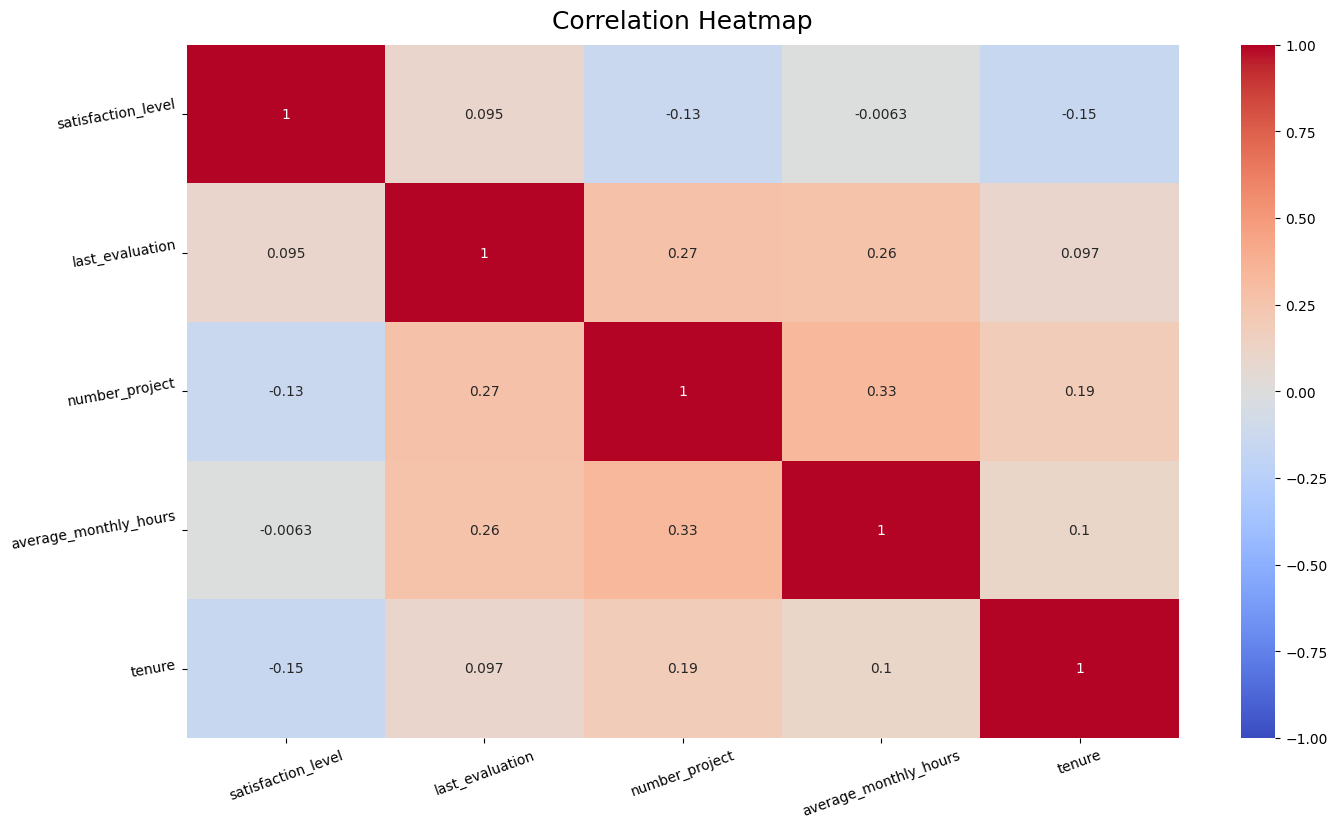

In [ ]:
# Create a heatmap to visualize how correlated variables are
columns_interest = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(data=df_enc[columns_interest].corr(),
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap='coolwarm',

                      )
plt.xticks(rotation=20)
plt.yticks(rotation=10)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show;

There doesn't seem ot be a single pair of highly correlated features.
Let's now create a stacked bar plot to visualize the number of employees across departments, comparing those who left with those who did not.

In [ ]:
# Create a stacked bar plot to visualize the number of employees across department,
# comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave,
#1 (red color) represents employees who left
pd.crosstab(df1['department'],
            df1['left'],
            margins=True,
            normalize='index').style.background_gradient(cmap='Purples')

In [ ]:
pd.crosstab(df1['department'],
            df1['left']).style.background_gradient(cmap='Purples')

NameError: name 'pd' is not defined

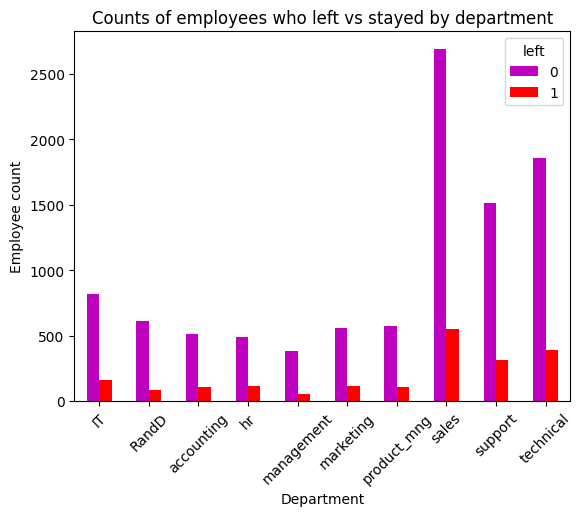

In [ ]:
pd.crosstab(df1['department'], df1['left']).plot(kind='bar', color='mr')
plt.title('Counts of employees who left vs stayed by department')
plt.xlabel('Department')
plt.ylabel('Employee count')
plt.xticks(rotation=45)
plt.show()

Logistic regression is quite sensitive to outliers, t would be a good idea at this stage to remove the outliers in the tenure column that were identified earlier.

In [ ]:
# Select rows without outliers in `tenure` and save resulting df in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_logreg.head(3)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   

   tenure  work_accident  left  promotion_last_5years  salary tenure_category  \
0       3              0     1                      0       0           short   
2       4              0     1                      0       1           short   
3       5              0     1                      0       0           short   

   department_IT  department_RandD  department_accounting  department_hr  \
0          False             False                  False          False   
2          False             False                  False          False   
3          False             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False

Isolate the outcome variable, which is the variable we want our model to predict.

In [ ]:
#Isolating the outcome variable
y = df_logreg['left']
y.value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

In [ ]:
# Select the features you want to use in your model
df_logreg = df_logreg.drop(['tenure_category'], axis=1)
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0          False   
2       4              0                      0       1          False   
3       5              0                      0       0          False   
4       3              0                      0       0          False   
5       3              0                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

Split the data into training set and testing set. We will stratify based on the values in y, since the classes are unbalanced.


In [ ]:
#splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

Construct a logistic regression model and fit it to the training dataset.

In [ ]:
base_model = LogisticRegression(random_state=42,
                             max_iter=500)

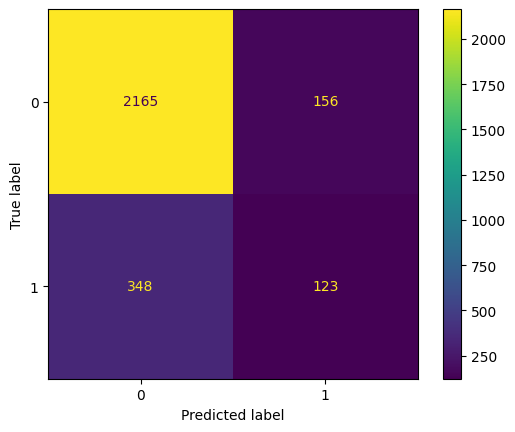

In [ ]:
def train_model(model, training_set, test_set):
    X_train, y_train = training_set
    X_test, y_test = test_set
    #Fitting the model
    model.fit(X_train, y_train)
    # Use the  model to get predictions on the test set
    y_pred = model.predict(X_test)

    # Compute values for confusion matrix
    log_cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)

    # Create display of confusion matrix
    log_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                    display_labels=model.classes_)

    # Plot confusion matrix
    log_disp.plot(values_format='')

    # Display plot
    plt.show()

    return model

log_clf = train_model(base_model, (X_train, y_train), (X_test, y_test))

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.



1.   True negatives: The number of people who did not leave that the model accurately predicted did not leave.
2.   False positives: The number of people who did not leave the model inaccurately predicted as leaving.
3.  False negatives: The number of people who left that the model inaccurately predicted did not leave.
4. True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Check the class balance in the data. In other words, check the value counts in the left column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.


In [ ]:
df_logreg['left'].value_counts(normalize=True).round(4)*1e2

left
0    83.15
1    16.85
Name: proportion, dtype: float64

In [ ]:
target_names = ['Predicted would not leave', 'Predicted would leave']
y_pred = log_clf.predict(X_test)
pd.DataFrame(metrics.classification_report(y_test, y_pred,
                                           output_dict=True,
                                           target_names=target_names)).T.round(2)

precision  recall  f1-score  support
Predicted would not leave       0.86    0.93      0.90  2321.00
Predicted would leave           0.44    0.26      0.33   471.00
accuracy                        0.82    0.82      0.82     0.82
macro avg                       0.65    0.60      0.61  2792.00
weighted avg                    0.79    0.82      0.80  2792.00

The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.


## Modeling Approach B: Tree-based Model

This approach covers implementation of Decision Tree and Random Forest ensembles.

In [ ]:
## Instantiate the model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
tree_params = {
    'max_depth' : [4, 6, 8, None],
    'min_samples_leaf' : [2, 5, 1],
    'min_samples_split' : [2, 4, 6]
}

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree_grid = GridSearchCV(estimator=tree,
                         param_grid=tree_params,
                         scoring=scoring,
                         cv=4, refit='roc_auc')

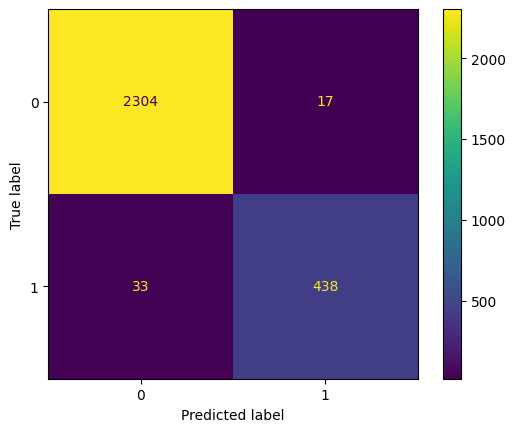

CPU times: user 5.67 s, sys: 17.6 ms, total: 5.69 s
Wall time: 5.85 s


In [ ]:
%%time
tree_model = train_model(tree_grid, (X_train, y_train), (X_test, y_test))

In [ ]:
tree_model.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

Identify the best AUC score achieved by the decision tree model on the training set.

In [ ]:
tree_model.best_score_

np.float64(0.9738070859906354)

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

Next, you can write a function that will help you extract all the scores from the grid search.


In [ ]:
def make_results(model_name:str, model_object, metric:str):

    metric_dict ={
        'accuracy': 'mean_test_accuracy',
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall',
        'f1': 'mean_test_f1',
        'roc_auc': 'mean_test_roc_auc'
    }

    cv_results = pd.DataFrame(model_object.cv_results_)

    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    auc = best_estimator_results.mean_test_roc_auc
    acc = best_estimator_results.mean_test_accuracy
    prec = best_estimator_results.mean_test_precision
    rec = best_estimator_results.mean_test_recall
    f1 = best_estimator_results.mean_test_f1

    table = pd.DataFrame({
        'Model': [model_name],
        'AUC': [auc],
        'Accuracy': [acc],
        'Precision': [prec],
        'Recall': [rec],
        'F1': [f1]
    })

    return table


Use this function just defined to get all the scores from the grid search

In [ ]:
tree_cv_results = make_results('Decision Tree', tree_model, 'roc_auc')
tree_cv_results

Model       AUC  Accuracy  Precision    Recall        F1
0  Decision Tree  0.973807  0.978747   0.959115  0.912839  0.935275

All of these scores from the decision tree model are strong indicators of good model performance.

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. You could construct a random forest model next.


**Random Forest - Round 1**

Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.72 µs


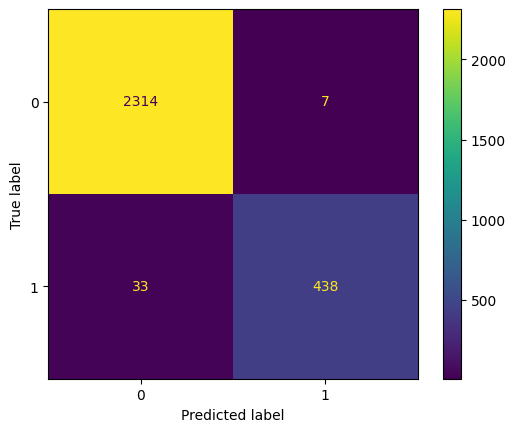

In [ ]:
## Instantiate the model
tree = ensemble.RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
tree_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf_grid = GridSearchCV(estimator=tree,
                         param_grid=tree_params,
                         scoring=scoring,
                         cv=4, refit='roc_auc')

%time
rf_model = train_model(rf_grid, (X_train, y_train), (X_test, y_test))

In [ ]:
# Define a path to the folder where you want to save the model
path = '/content/drive/MyDrive/Portfolio'

Define functions to pickle and read in the model

In [ ]:
def write_pickle(path, model_object, save_as:str):
    '''
    In:
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

def read_pickle(path, saved_model_name:str):
    '''
    In:
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out:
        model: the pickled model
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

Use the functions defined above to save the model in a pickle file and then read it in.

In [ ]:
#Write pickle
write_pickle(path, rf_model, 'rf_model')

In [ ]:
#Read pickle
read_pickle(path, 'rf_model')

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

Identify the best AUC score achieved by the random forest model on the training set.

In [ ]:
rf_model.best_score_

np.float64(0.9802415320040019)

Identify the optimal values for the parameters of the random forest model.

In [ ]:
rf_model.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [ ]:
#Get all CV scores
rf_model_cv_results = make_results('random forest cv', rf_model, 'roc_auc')

display(tree_cv_results)
display(rf_model_cv_results)

Model       AUC  Accuracy  Precision    Recall        F1
0  Decision Tree  0.973807  0.978747   0.959115  0.912839  0.935275

Model       AUC  Accuracy  Precision    Recall        F1
0  random forest cv  0.980242  0.979702   0.968981  0.908588  0.937703

The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall (the recall score of the random forest model is approximately 0.001 lower, which is a negligible amount). This indicates that the random forest model mostly outperforms the decision tree model.
Next, we will evaluate the final model on the test set.

In [ ]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = metrics.roc_auc_score(y_test_data, preds)
    accuracy = metrics.accuracy_score(y_test_data, preds)
    precision = metrics.precision_score(y_test_data, preds)
    recall = metrics.recall_score(y_test_data, preds)
    f1 = metrics.f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

Now use the best performing model to predict on the test set

In [ ]:
#Getting predictions on the test data

test_results = get_scores('Random Forest Test', rf_model, X_test, y_test)
test_results

model  precision    recall        f1  accuracy      AUC
0  Random Forest Test    0.98427  0.929936  0.956332  0.985673  0.96346

**Feature Engineering**

We might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring.

#### What is Data leakage?

Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

We could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. We'll call this new feature `overworked`. It will be a binary variable.

In [ ]:
# Drop ´satisfaction_level´ and save resulting dataframe in a new variable
df2 = df_enc.drop('satisfaction_level', axis=1)
#Display first few rows of new dataframe
df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary tenure_category  \
0              0     1                      0       0           short   
1              0     1                      0       1           short   
2              0     1                      0       1           short   
3              0     1                      0       0           short   
4              0     1                      0       0           short   

   department_IT  department_RandD  department_accounting  department_hr  \
0          False             False                  False          False   
1          False             False                  False          False   
2          False             False                  False          False   
3          False             False                  False          False   
4          False             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [ ]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.

You could define being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, you could reassign the column using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0`

In [ ]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

In [ ]:
# Display distribution
df2['overworked'].value_counts()

overworked
1    7630
0    4361
Name: count, dtype: int64

In [ ]:
df2['overworked'].value_counts(normalize=True).round(4)*1e2

overworked
1    63.63
0    36.37
Name: proportion, dtype: float64

Drop the `average_monthly_hours` column.


In [ ]:
# Drop the `average_monthly_hours` column
df2 = df2.drop(['average_monthly_hours', 'tenure_category'], axis=1)

# Display first few rows of resulting dataframe
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   
2                      0       1          False             False   
3                      0       0          False             False   
4                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False           0  
1               False                 False           1  
2               False                 False           1  
3               False                 False           1  
4               False                 False           0

Creating our X and y variables

In [ ]:
#Select the feature dataset
X = df2.drop('left', axis=1)

#Select the target variable
y = df2['left']

Creating our test and train dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    random_state=0)
#Since we do not specify the value for the test_size, it takes the default
#value of 25% for testing and 75% for training.

**Decision Tree - Round 2**

In [ ]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree2 = GridSearchCV(estimator=tree,
                     param_grid=cv_params,
                     scoring=scoring,
                     cv=4,
                     refit='roc_auc')

CPU times: user 0 ns, sys: 12 µs, total: 12 µs
Wall time: 25.3 µs


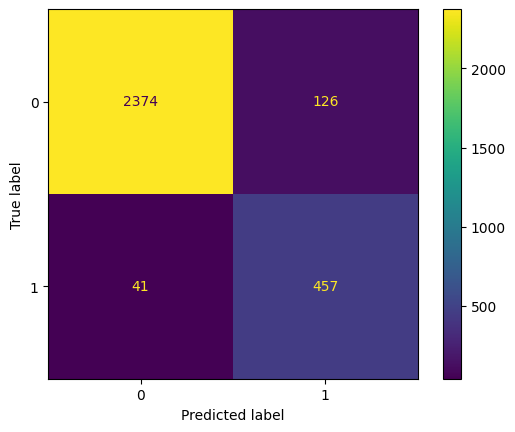

In [ ]:
%time
tree2_model = train_model(tree2, (X_train, y_train), (X_test, y_test))

In [ ]:
print("Best parameters: ", tree2_model.best_params_)
print("Best score: ", tree2_model.best_score_)

Best parameters:  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}
Best score:  0.9586752505340426


In [ ]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'roc_auc')
display(tree_cv_results)
display(tree2_cv_results)

Model       AUC  Accuracy  Precision    Recall        F1
0  Decision Tree  0.973807  0.978747   0.959115  0.912839  0.935275

Model       AUC  Accuracy  Precision    Recall        F1
0  decision tree2 cv  0.958675  0.958523   0.856693  0.903553  0.878882

Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.


**Random Forest - Round 2**

In [ ]:
# Instantiate model
rf = ensemble.RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf2 = GridSearchCV(estimator=rf,
                   param_grid=cv_params,
                   scoring=scoring,
                   cv=4,
                   refit='roc_auc')

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs


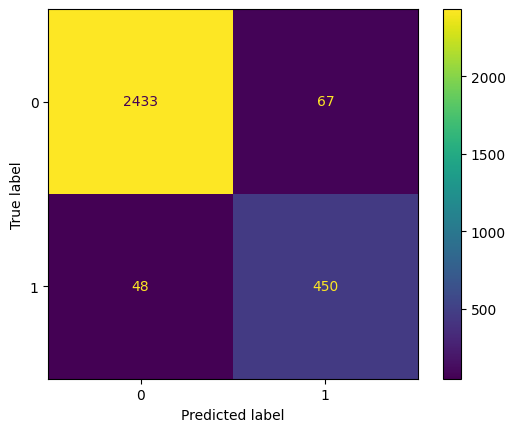

In [ ]:
%time
rf2_model = train_model(rf2, (X_train, y_train), (X_test, y_test))

In [ ]:
#Write pickle
write_pickle(path, rf2_model, 'rf2_model')

In [ ]:
#Read pickle
rf2_model = read_pickle(path, 'rf2_model')
print("Best parameters: ", rf2_model.best_params_)
print("Best score: ", rf2_model.best_score_)

Best parameters:  {'max_depth': 5, 'max_features': 1.0, 'max_samples': 0.7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best score:  0.9648100662833985


In [ ]:
#Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2_model, 'roc_auc')
display(rf2_cv_results)
display(tree2_cv_results)

Model      AUC  Accuracy  Precision    Recall        F1
0  random forest2 cv  0.96481  0.957411   0.866758  0.878754  0.872407

Model       AUC  Accuracy  Precision    Recall        F1
0  decision tree2 cv  0.958675  0.958523   0.856693  0.903553  0.878882

Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric.

Score the champion model on the test set now.


In [ ]:
#Get predictions on test data
rf2_test_scores = get_scores('Random Forest2 Test', rf2_model, X_test, y_test)
rf2_test_scores

model  precision    recall      f1  accuracy       AUC
0  Random Forest2 Test   0.870406  0.903614  0.8867  0.961641  0.938407

This seems to be a stable, well-performing final model.

From the confusion matrix obtained earlier during the fitting process, we can notice that the model predicts more False Positives (FP) than False Negatives (FN), which means that some employees may be identified as at risk of quitting or getting fired, when that is actually not the case.
But this is yet a robust model.

For exploratory purpose, you might want to inspect the splits of the decision tree model and the most important features in the random forest model.

**Decision Tree Splits**

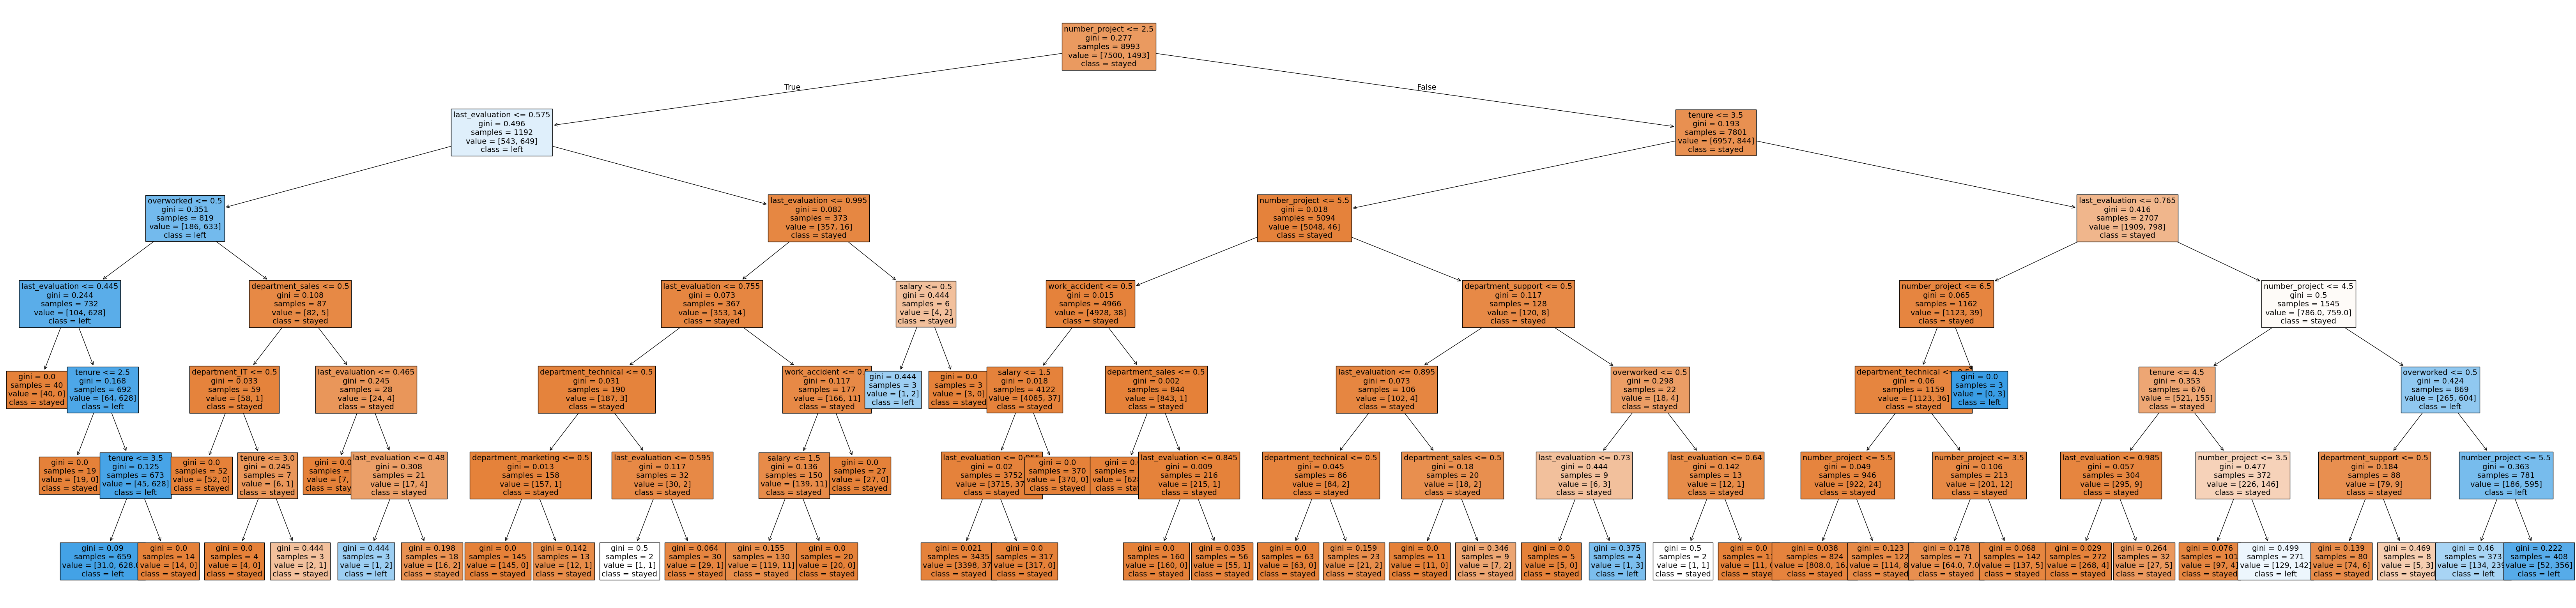

In [ ]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_,
          max_depth=6,
          fontsize=14,
          feature_names=X.columns,
          class_names={0:'stayed', 1:'left'},
          filled=True);
plt.show()

In [ ]:
def feature_importance_plot(data, index_names, plot_title:str):
    model_importances = pd.DataFrame(data=data.feature_importances_,
                                     columns=['gini_importance'],
                                     index=index_names
                                    )
    model_importances = model_importances.sort_values(by='gini_importance', ascending=False)
    display(model_importances)

    sns.barplot(data=model_importances,
            y=model_importances.index,
            x='gini_importance',
            palette='rocket',
            hue=model_importances.index,
            legend=False);
    plt.xticks(rotation=45);
    plt.grid(axis='x', );
    plt.ylabel('Feature');
    plt.xlabel('Gini Importance');
    plt.title(plot_title, fontsize=14);
    plt.show()
    return model_importances

gini_importance
last_evaluation                0.343958
number_project                 0.343385
tenure                         0.215681
overworked                     0.093498
department_support             0.001142
salary                         0.000910
department_sales               0.000607
department_technical           0.000418
work_accident                  0.000183
department_IT                  0.000139
department_marketing           0.000078
promotion_last_5years          0.000000
department_RandD               0.000000
department_accounting          0.000000
department_product_mng         0.000000
department_hr                  0.000000
department_management          0.000000

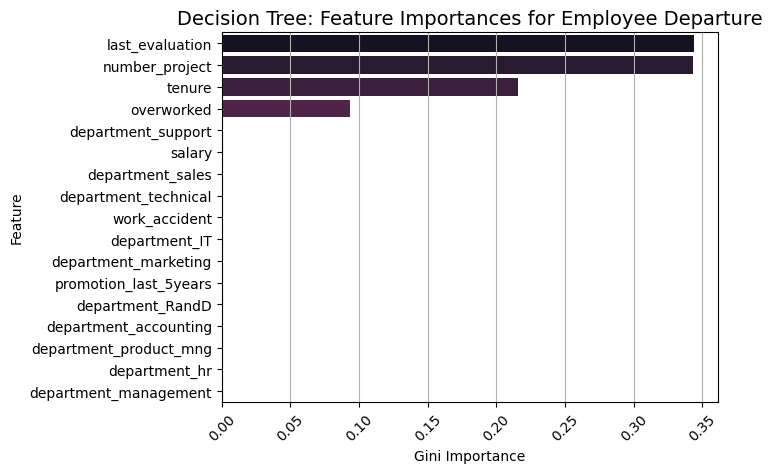

In [ ]:
tree2_importances = feature_importance_plot(tree2.best_estimator_,
                                            X.columns,
                                            'Decision Tree: Feature Importances for Employee Departure')


The barplot above shows that in this decision tree model,

1.   `last_evaluation`
2.   `number_project`
3.   `tenure`
4.   `overworked`

 Have the highest importance, in that specific order. These variables are most helpful in predicting the outcome variable, `left`.

#### Random forest feature importance

Now, plot the feature importances for the random forest model.

gini_importance
last_evaluation                0.359494
number_project                 0.356801
tenure                         0.199109
overworked                     0.080984
salary                         0.000644
department_sales               0.000612
department_support             0.000578
department_technical           0.000414
department_IT                  0.000291
work_accident                  0.000276
department_accounting          0.000225
department_product_mng         0.000165
department_RandD               0.000125
department_marketing           0.000098
department_hr                  0.000096
department_management          0.000049
promotion_last_5years          0.000040

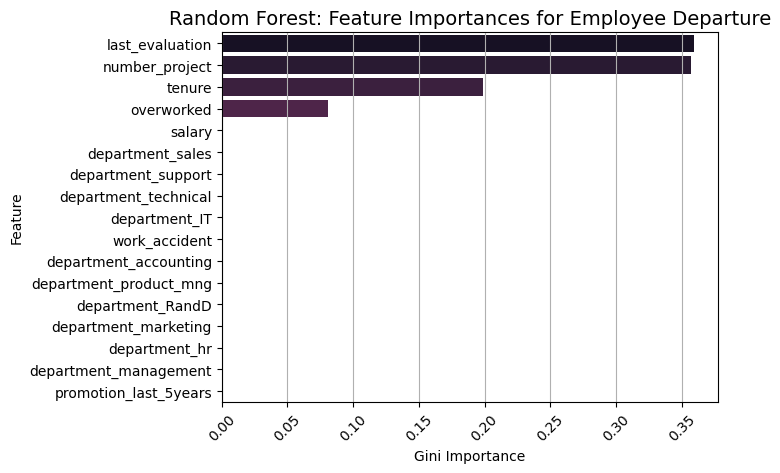

In [ ]:
rf2_importances = feature_importance_plot(rf2.best_estimator_,
                                          X.columns,
                                          'Random Forest: Feature Importances for Employee Departure')

The plot above shows that in this random forest model,
1.   `last_evaluation`
2.   `number_project`
3.   `tenure`
4.   `overworked`

have the highest importance, in that order, just like in the single Tree classifier.

These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered **the probability that the model ranks a random positive example more highly than a random negative example**.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- Three features were key to predict the departure of employees, which are ´number_project´, ´tenure´, ´overworked´. Of special interest is this last variable, since many employees are actually overworked, with number of hours worked per month higher than the normal value of 166.68 hours/month.
- What business recommendations do you propose based on the models built?

Reduce the number of projects to a maximum of 4.
Make more efficient the work performed by the employees by having less projects and being more productive while focusing in a smaller number of projects. This will make the hours worked more efficient.
- What potential recommendations would you make to your manager/company?
Invest more in productivity specifically by making each employee more especiallized in a sector. Preventing excessive amount of work hours that do not necesarily lead to more productive employees.
- Do you think your model could be improved? Why or why not? How?
Yes, it can be improved by doing a hyperparameter tuning more exhaustive
It can also improve by applying feature engineering in a more complex manner while also considering the use of the Recursive Feature Elimination to select the dataset with the appropiate amount of parameters.
- Given what you know about the data and the models you were using, what other questions could you address for the team?
The significance of each department performance is not relevant to the outcome, that means that specific situations pertaining to each sector does not have a noticeable impact on the employee departure rate. This implies that the nature of the job is not a reason for departure but rather the manner in which the work culture at the company is handled.
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?
Since there are no Personal Identifiable Information (PII) nor any other parameter inherent to each employee, there is no bias that could be related to gender, race, age, economic background, we can conclude that there are no ethical considerations that should be taken into account to protect the integrity of each employee.




Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results
We use two main models:

1.  **Logistic Regression**

The logistic regression model achieved on the test set:
-  precision of 80%,
-  recall of 83%,
-  f1-score of 80% (all weighted averages)
-  accuracy of 83%

2.  **Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved on the test set:
-  AUC of 93.8%,
-  precision of 87.0%,
-  recall of 90.4%,
-  f1-score of 88.7%
-  accuracy of 96.2%.

The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
* Either reward employees for working longer hours, or don't require them to do so.
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

For another project, you could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.